In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
df_train=pd.read_csv('Corona_NLP_test.csv',parse_dates=['TweetAt'])
df_test=pd.read_csv('Corona_NLP_test.csv',parse_dates=['TweetAt'])

In [31]:
df_train.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,2020-02-03,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",2020-02-03,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,2020-02-03,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,2020-02-03,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",2020-03-03,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


In [32]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   UserName       3798 non-null   int64         
 1   ScreenName     3798 non-null   int64         
 2   Location       2964 non-null   object        
 3   TweetAt        3798 non-null   datetime64[ns]
 4   OriginalTweet  3798 non-null   object        
 5   Sentiment      3798 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 178.2+ KB


In [33]:
labels_sentiment=df_train.Sentiment.unique()
print(labels_sentiment)

['Extremely Negative' 'Positive' 'Extremely Positive' 'Negative' 'Neutral']


In [34]:
labels={
    str(labels_sentiment[0]):-2,
str(labels_sentiment[1]):1,
str(labels_sentiment[2]):2,
str(labels_sentiment[3]):-1,
str(labels_sentiment[4]):0,
}

In [35]:
df_train['classification']=df_train['Sentiment'].map(labels)
df_test['classification']=df_test['Sentiment'].map(labels)

In [36]:
print(df_train.TweetAt.min(),df_train.TweetAt.max())

2020-02-03 00:00:00 2020-12-03 00:00:00


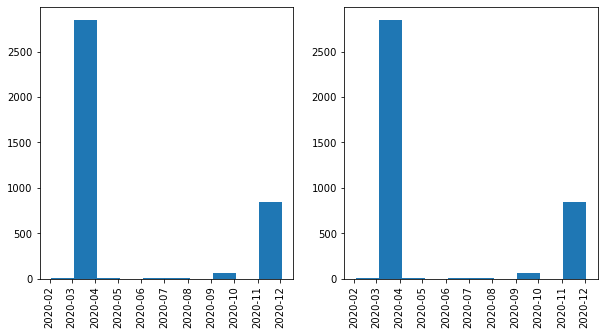

In [10]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
ax[0].hist(df_train.TweetAt)
ax[0].tick_params(axis='x',rotation=90)
ax[1].hist(df_test.TweetAt)
ax[1].tick_params(axis='x',rotation=90)

In [11]:
### Primeira coisa interessante, analisar inicialmente com todos os dados, depois analisar os dados dos meses anteriores a dezembro e depois olhar como se sai em dezembro.

Text(0.5, 0, 'log(rate_location)')

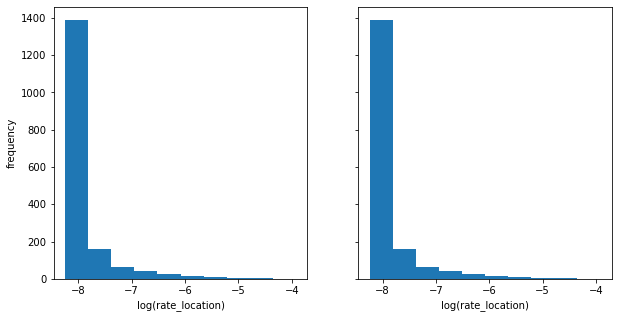

In [12]:
fif,ax=plt.subplots(1,2,figsize=(10,5),sharey=True)
ax[0].hist(np.log(df_train.groupby('Location').count()['UserName']/len(df_train)))
ax[0].set_xlabel('log(rate_location)')
ax[0].set_ylabel('frequency')
fig.suptitle('Distribution of log location rate')
ax[1].hist(np.log(df_test.groupby('Location').count()['UserName']/len(df_train)))
ax[1].set_xlabel('log(rate_location)')

In [13]:
df_train.groupby('Location').count()['UserName'].nlargest(10)/len(df_train)

Location
United States       0.019747
London, England     0.012638
Washington, DC      0.010005
New York, NY        0.008952
Los Angeles, CA     0.008689
Canada              0.007636
Toronto, Ontario    0.007636
California, USA     0.006846
London              0.006582
Toronto             0.005529
Name: UserName, dtype: float64

In [14]:
df_test.groupby('Location').count()['UserName'].nlargest(10)/len(df_train)

Location
United States       0.019747
London, England     0.012638
Washington, DC      0.010005
New York, NY        0.008952
Los Angeles, CA     0.008689
Canada              0.007636
Toronto, Ontario    0.007636
California, USA     0.006846
London              0.006582
Toronto             0.005529
Name: UserName, dtype: float64

In [15]:
print(df_train.OriginalTweet.isnull().sum(),df_test.OriginalTweet.isnull().sum())

0 0


# NLP 

## Parte 1

In [16]:
from wordcloud import WordCloud


In [17]:
tweets=''
for tweet in df_train.OriginalTweet:
    tweets+=tweet

tweets_positive=''
for tweet in df_train.OriginalTweet[df_train.classification>0]:
    tweets_positive+=tweet   

tweets_negative=''
for tweet in df_train.OriginalTweet[df_train.classification<0]:
    tweets_negative+=tweet   

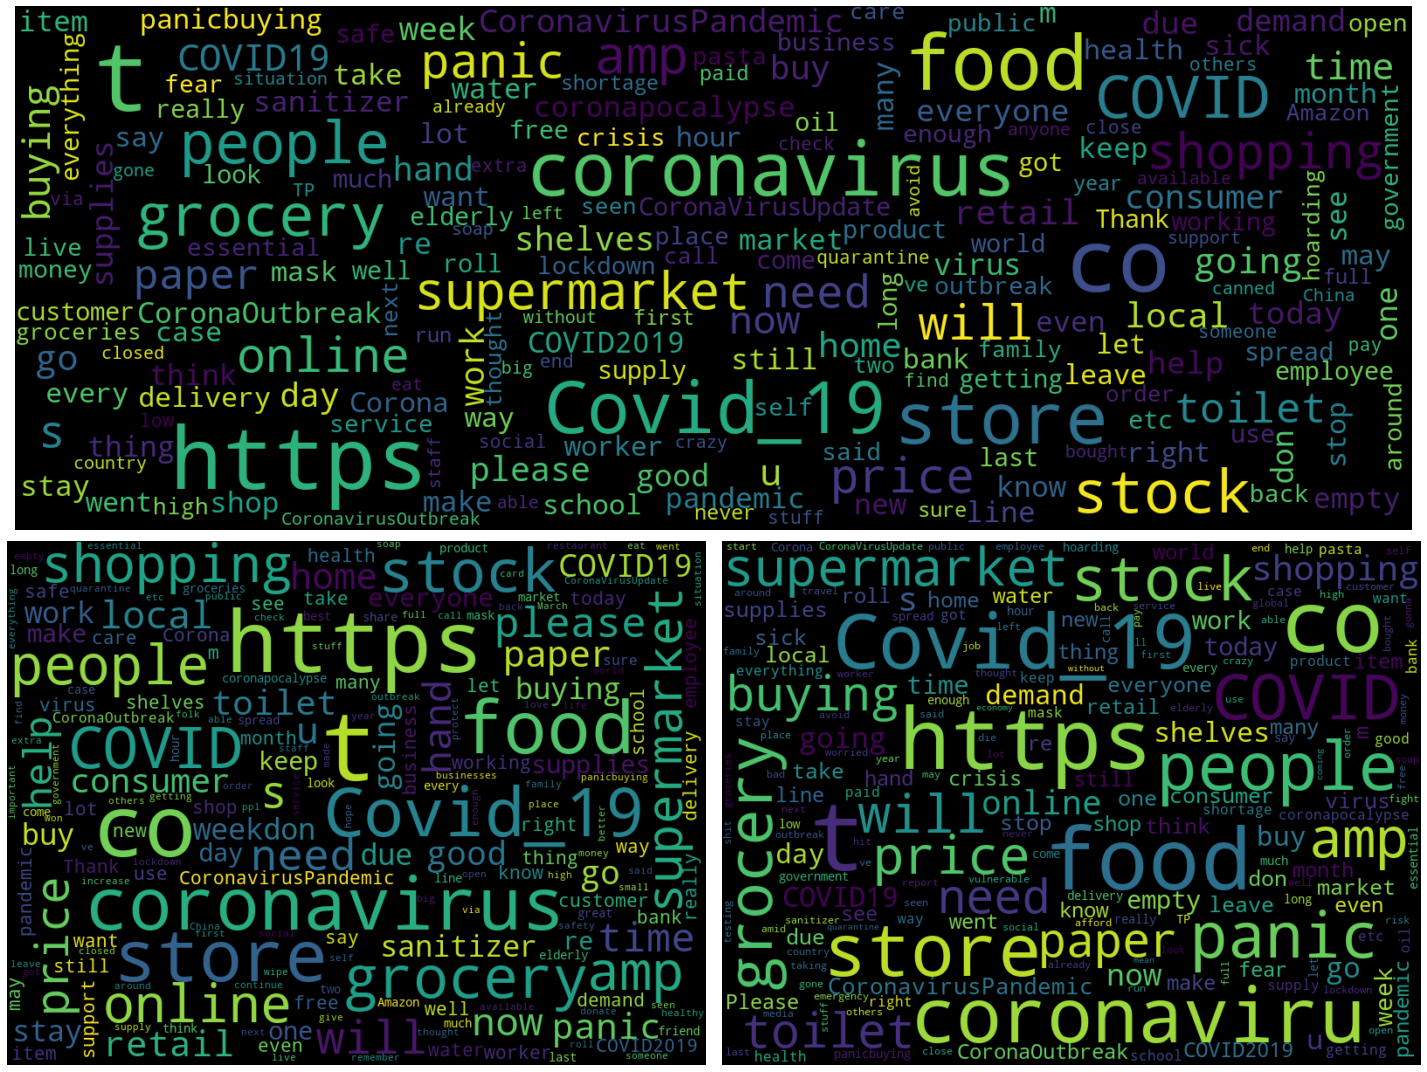

In [18]:
word_clound=WordCloud(width=1600,height=600,max_font_size=110,collocations=False).generate(tweets)
word_clound_positive=WordCloud(width=800,height=600,max_font_size=110,collocations=False).generate(tweets_positive)
word_clound_negative=WordCloud(width=800,height=600,max_font_size=110,collocations=False).generate(tweets_negative)


fig,ax=plt.subplots(2,2,figsize=(20,15))
gs=ax[0,0].get_gridspec()
for axes in ax[0,:].flatten():
    axes.remove()
AX=fig.add_subplot(gs[0,:])
    

AX.imshow(word_clound,interpolation='bilinear')
AX.axis(False)
ax[1,0].imshow(word_clound_positive,interpolation='bilinear')
ax[1,1].imshow(word_clound_negative,interpolation='bilinear')
ax[1,0].axis(False)
ax[1,1].axis(False)
fig.tight_layout()


In [41]:
import nltk

In [42]:
token_space=nltk.tokenize.WhitespaceTokenizer()
token_tweets=token_space.tokenize(tweets)
frequency=nltk.FreqDist(token_tweets)

NameError: name 'tweets' is not defined

<BarContainer object of 10 artists>

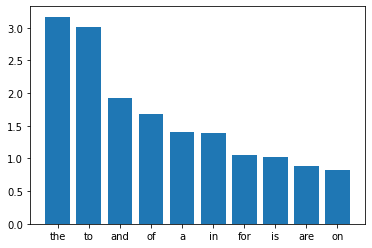

In [21]:
df_freq=pd.DataFrame({'word':list(frequency.keys()),'frequency':list(frequency.values())})

top_10=df_freq.nlargest(columns='frequency',n=10).frequency/df_freq.frequency.sum()*100
plt.bar(df_freq.nlargest(columns='frequency',n=10).word,top_10)
# plt.xticks(df_freq.nlargest(columns='frequency',n=10).word)

In [22]:
stop_words=nltk.corpus.stopwords.words('english')
stop_words[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [23]:
df_train['filter1']=' '+df_train.OriginalTweet+' '
for word in stop_words:
    df_train['filter1']=df_train.filter1.str.replace(' '+word+' ',' ',regex=False)

In [24]:
def TOP_TEN(df,column):
    bag_of_words=''
    for line in df[column]:
        bag_of_words+=line
    token_space=nltk.tokenize.WhitespaceTokenizer()
    token_bag_of_words=token_space.tokenize(bag_of_words)
    frequency=nltk.FreqDist(token_bag_of_words)

    df_temp=pd.DataFrame({'word':list(frequency.keys()),'frequency':list(frequency.values())})
    top_10=df_temp.nlargest(columns='frequency',n=10).frequency/df_temp.frequency.sum()*100
    plt.bar(df_temp.nlargest(columns='frequency',n=10).word,top_10)
    plt.xticks(rotation=90)


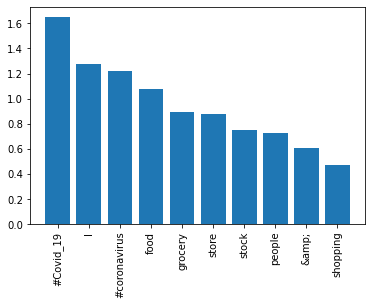

In [25]:
TOP_TEN(df_train,'filter1')

In [26]:
from string import punctuation

punc=list()
for i in punctuation:
    punc.append(i)
df_train['filter2']=df_train.filter1
for letter in punc:
    df_train['filter2']=df_train.filter2.str.replace(letter,'',regex=False)

In [27]:
df_train.filter1[1]

' When I find hand sanitizer Fred Meyer, I turned #Amazon. But $114.97 2 pack Purell??!!Check  #coronavirus concerns driving prices. https://t.co/ygbipBflMY '

In [28]:
df_train.filter2[1]

' When I find hand sanitizer Fred Meyer I turned Amazon But 11497 2 pack PurellCheck  coronavirus concerns driving prices httpstcoygbipBflMY '

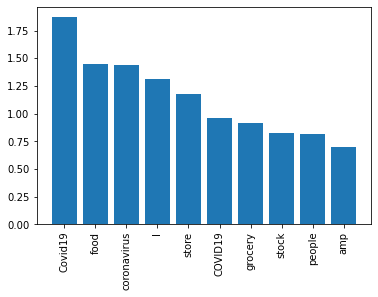

In [29]:
TOP_TEN(df_train,'filter2')

In [30]:
stemmer=nltk.stem.snowball.EnglishStemmer()


In [31]:
df_train['filter3']=df_train.filter2
df_train['filter3']=df_train['filter3'].apply(lambda x:x.split(' '))

df_train['filter3']=df_train['filter3'].apply(lambda x: [stemmer.stem(y) for y in x])
df_train['filter3']=df_train['filter3'].apply(lambda x: ' '.join(x))


In [32]:
df_train.filter3[1]

' when i find hand sanit fred meyer i turn amazon but 11497 2 pack purellcheck  coronavirus concern drive price httpstcoygbipbflmi '

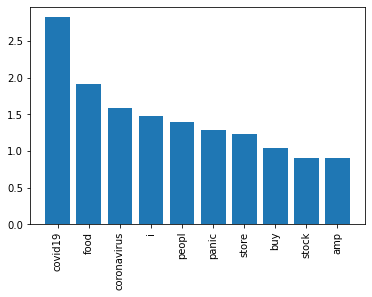

In [33]:
TOP_TEN(df_train[df_train.classification==-2],'filter3')

In [59]:
from sklearn.feature_extraction.text import  CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier



In [35]:
vectorize=CountVectorizer(lowercase=False,max_features=50)
bag_of_words=vectorize.fit_transform(df_train.OriginalTweet)
x=bag_of_words
y=df_train.classification

x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.25)
LG=LogisticRegression()
LG.fit(x_train,y_train)
accuracy=LG.score(x_test,y_test)
print('The accuracy achived was %.2f%%\n%d tweets were used in tranning and %d to test'%(accuracy*100,len(y_train),len(y_test)))



The accuracy achived was 31.26%
2848 tweets were used in tranning and 950 to test


C:\Users\Membro\anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [36]:
vectorize=CountVectorizer(lowercase=False,max_features=50)
bag_of_words=vectorize.fit_transform(df_train.filter3)
x=bag_of_words
y=df_train.classification

x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.25)
LG=LogisticRegression()
LG.fit(x_train,y_train)
accuracy=LG.score(x_test,y_test)
print('The accuracy achived was %.2f%%\n%d tweets were used in tranning and %d to test'%(accuracy*100,len(y_train),len(y_test)))



The accuracy achived was 32.95%
2848 tweets were used in tranning and 950 to test


In [37]:
tfidf=TfidfVectorizer(lowercase=False, max_features=1000)
array_tweets=tfidf.fit_transform(df_train.OriginalTweet)
x_train,x_test,y_train,y_test=train_test_split(array_tweets,df_train.classification,stratify=df_train.classification,test_size=0.25,random_state=123)
LG=LogisticRegression()
LG.fit(x_train,y_train)
accuracy=LG.score(x_test,y_test)
print('The accuracy achived was %.2f%%\n%d tweets were used in tranning and %d to test'%(accuracy*100,len(y_train),len(y_test)))



The accuracy achived was 39.68%
2848 tweets were used in tranning and 950 to test


In [38]:
tfidf=TfidfVectorizer(lowercase=False, max_features=1000)
array_filter=tfidf.fit_transform(df_train.filter3)
x_train,x_test,y_train,y_test=train_test_split(array_filter,df_train.classification,stratify=df_train.classification,test_size=0.25,random_state=123)
LG=LogisticRegression()
LG.fit(x_train,y_train)
accuracy=LG.score(x_test,y_test)
print('The accuracy achived was %.2f%%\n%d tweets were used in tranning and %d to test'%(accuracy*100,len(y_train),len(y_test)))


The accuracy achived was 41.68%
2848 tweets were used in tranning and 950 to test


In [39]:
dummy=DummyClassifier()
dummy.fit(x_train,y_train)

accuracy=dummy.score(x_test,y_test)
print('The accuracy achived was %.2f%%\n%d tweets were used in tranning and %d to test'%(accuracy*100,len(y_train),len(y_test)))



The accuracy achived was 27.37%
2848 tweets were used in tranning and 950 to test


## Parte 2

In [2]:
from gensim.models import KeyedVectors
import gensim.downloader
import string

C:\Users\Membro\anaconda3\envs\myenv\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [14]:
model=KeyedVectors.load_word2vec_format('cc.en.300.vec/cc.en.300.vec')

In [18]:
model.similar_by_word('mercy')

[('merciful', 0.7130741477012634),
 ('mercy.', 0.6701267957687378),
 ('mercy.The', 0.6462268233299255),
 ('mercifulness', 0.6299896836280823),
 ('mercy.I', 0.6108291745185852),
 ('grace', 0.5767267346382141),
 ('compassion', 0.5758342146873474),
 ('all-merciful', 0.5585176348686218),
 ('forgiveness', 0.5562059879302979),
 ('mercies', 0.54868483543396)]

In [43]:
def tokenizer(text):
    text=text.lower()
    list_words_numbers=[]
    tokens=nltk.word_tokenize(text)
    for token in tokens:
        if token in string.punctuation: continue
        list_words_numbers.append(token)
    return list_words_numbers

In [44]:
tokenizer('I was half mile away')

['i', 'was', 'half', 'mile', 'away']

In [83]:
dimension=300
def vector_sum(word_number):
    vector=np.zeros(dimension)
    for w_n in word_number:
        try:
            vector+=model.get_vector(w_n)
        except KeyError:
            vector+=model.get_vector('unkown')

    return vector
  

In [84]:
matrix=np.zeros((len(df_train.OriginalTweet),dimension))

for i in range(0,len(df_train.OriginalTweet)):
    row=df_train.OriginalTweet[i]
    token=tokenizer(row)
    matrix[i,:]=vector_sum(token)

x_train,x_test,y_train,y_test=train_test_split(matrix,df_train.classification,random_state=123,stratify=df_train.classification,test_size=0.25)


C:\Users\Membro\anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(max_iter=1000)

In [85]:
LG=LogisticRegression(max_iter=5000)
LG.fit(x_train,y_train)
predicted_label=LG.predict(x_test)
print(predicted_label.shape,y_test.shape)
accuracy=LG.score(x_test,y_test)
print('The accuracy achived was %.2f%%\n%d tweets were used in tranning and %d to test'%(accuracy*100,len(y_train),len(y_test)))

(950,) (950,)
The accuracy achived was 42.00%
2848 tweets were used in tranning and 950 to test
